# Определение перспективного продукта для магазина компьютерных игр

1. [Описание проекта](#description), 
2. [Описание данных](#description2)  
2. [Знакомство с данными, предварительная обработка и подготовка данных](#step1) 
2. [Исследовательский анализ данных](#step2) 
2. [Портрет пользователя каждого региона](#step3) 
2. [Проверка гипотез](#step4)
2. [Общий вывод](#step5)



## Описание проекта. <a name="description"></a>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных. <a name="description2"></a>

__Name__— название игры
 
__Platform__ — платформа
 
__Year_of_Release__— год выпуска
 
__Genre__ — жанр игры

__NA_sales__ — продажи в Северной Америке (миллионы проданных копий)

__EU_sales__ — продажи в Европе (миллионы проданных копий)

__JP_sales__ — продажи в Японии (миллионы проданных копий)

__Other_sales__ — продажи в других странах (миллионы проданных копий)

__Critic_Score__ — оценка критиков (максимум 100)

__User_Score__ — оценка пользователей (максимум 10)

__Rating__ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

* Данные за 2016 год могут быть неполными.

## Знакомство с данными, предварительная обработка и подготовка данных.<a name="step1"></a>

In [1]:
#проведем импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import scipy.stats as st
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment=None
import math
import copy
import warnings; warnings.filterwarnings(action='once')
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (10, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")



In [2]:
#познакомимся с данными
games = pd.read_csv('/datasets/games.csv')
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11128,Supreme Commander,X360,2008.0,Strategy,0.07,0.01,0.00,0.01,56.0,5.7,E10+
6214,The Smurfs: Dance Party,Wii,2011.0,Misc,0.21,0.04,0.00,0.02,NaN,tbd,E
11460,Outlaw Golf,GC,2002.0,Sports,0.06,0.02,0.00,0.00,69.0,tbd,T
7006,Puss in Boots,X360,2011.0,Action,0.20,0.02,0.00,0.02,NaN,NaN,NaN
16326,Victory Spike,PS,1996.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
#проверим на дубликаты
games.duplicated().sum()

0

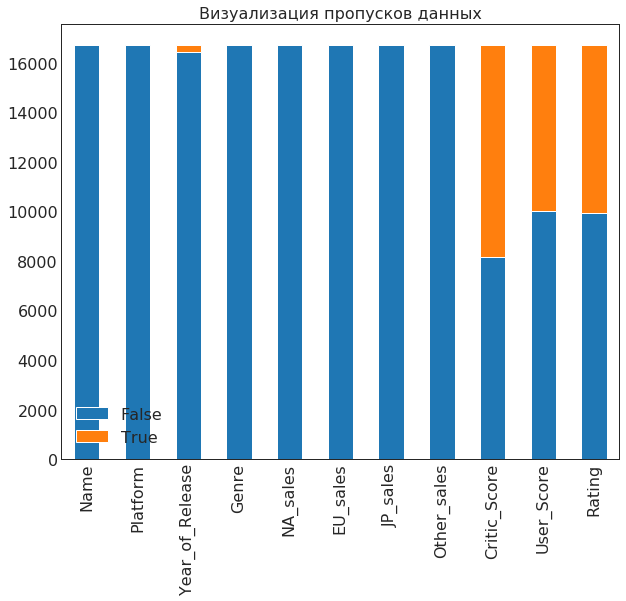

In [6]:
#посмотрим на пропуски данных
games.isna().apply(pd.Series.value_counts).transpose().plot(kind = 'bar', stacked = True, figsize = (10,8))
plt.legend(loc='lower left')
plt.title('Визуализация пропусков данных')
plt.show()

#### Необходимо провести предварительную обработку данных
* привести названия столбцов к нижнему регистру;
* привести тип данных в столбце __user_score__ к типу float,так как в нем должны содержаться числовые значения;
* Данные не содержат дубликатов, но содержат много пропусков.Пропуски есть в столбцах __year_of_release__,__critic_score__,__user_score__ и __rating__.Нужно будет по возможности заполнить пропуски.

In [7]:
#приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

Рассмотрим детально данные, содержащиеся в столбце __user_score__. Значения в данном столбце должны быть числовыми (оценка пользователей от 0 до 10), но тип данных у нас - object.

In [8]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди числовых значений встречается сокращение  [tbd][1]. Одной из наиболее частых расшифровок данной аббревиатуры является фраза __to be determined__

[1]: https://www.abbreviationfinder.org/ru/acronyms/tbd.html        "tbd"
Получается, что в тех строках, где вместо рейтинга стоит tbd рейтинг еще не определен. Возможно игра слишком старая, или наоборот, слишком новая и по ней нет данных? 
Посмотрим как много таких значений в столбце?

In [9]:
games['user_score'].value_counts().loc['tbd']

2424

Строк, где не проставлена оценка пользователей довольно много. Мы не можем определить значение даннного показателя за пользователей, и не можем заменить его на 0,так как 0 это тоже пользовательская оценка, поэтому заменим tbd каким нибудь индикатором, который позволит нам привести данные к типу float , но при этом не повлияет на расчет средних значений. Оценка пользователей выставляется в диапазоне от  0 до 10, поэтому мы можем взять любое из значений, не входящих в этот диапазон как индикатор, например -1

In [10]:
games['user_score'] = games['user_score'].replace({'tbd':np.nan})
games['user_score'] = games['user_score'].astype('float')
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Посмотрим на пропуски в данных

В столбце __critic_score__ диапазон значений от 13 до 98,можно было бы заполнить пропуски 0, но, исходя из описания данных, оценка критиков выставляется от 0 до 100, и 0 тоже мог бы послужить оценкой игры. Оставим пропуски без изменений

В столбце __rating__ также немало пропусков. Из описания данных  мы знаем, что это рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта организация действует на территории США и Канады, таким образом, если игра не выходила на рынок этих стран, рейтинг от ESRB ей не присваивался. Заполним пропуски фразой "no rating"

In [13]:
games['rating'] = games['rating'].fillna("no rating")

In [14]:
#выведем общую информацию
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Пропуски остались в столбцах __name__, __genre__ и __year_of_release__.". Данные пропуски мы не будем заполнять, в столбцах __name__ и  __genre__ их количество очень невелико. Пропуски в столбце год выпуска заменять не будем, так как мы не знаем точную дату выпуска той или иной игры.


Отсутствие рейтинга ESRB может свидетельствовать о том, что данная игра не оценивалась этой организацией; возможно релиз был в стране, где приняты другие системы оценки и разделения на возрастные категории. Отсутствие оценок критиков и пользователей может говоритьо том, что релиз игры остался ими незамеченным или произошел в то время, когда еще не существовало системы подобных оценок.


Посчитаем суммарные продажи во всех регионах и добавим их в отдельный столбец

In [15]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [16]:
#выведем выборку строк датафрейма
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13616,The Smurfs,PS,1998.0,Action,0.02,0.02,0.00,0.00,NaN,NaN,no rating,0.04
15185,Geten no Hana,PSP,2013.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,no rating,0.02
2372,Rock Band 3,X360,2010.0,Misc,0.73,0.09,0.00,0.06,93.0,8.2,T,0.88
4919,Jampack Winter 2003 (RP-T),PS2,2003.0,Misc,0.19,0.15,0.00,0.05,NaN,NaN,no rating,0.39
8592,Minna no DS Seminar: Kanpeki Kanji Ryoku,DS,2006.0,Misc,0.00,0.00,0.16,0.00,NaN,NaN,no rating,0.16
3165,Cruis'n World,N64,1998.0,Racing,0.59,0.04,0.00,0.01,NaN,NaN,no rating,0.64
5222,Dai-2-Ji Super Robot Taisen Z Saisei-hen,PSP,2012.0,Strategy,0.00,0.00,0.36,0.00,NaN,NaN,no rating,0.36
11388,101-in-1 Sports Megamix,DS,2010.0,Sports,0.08,0.00,0.00,0.01,NaN,NaN,E10+,0.09
14551,N+,PSP,2007.0,Platform,0.03,0.00,0.00,0.00,79.0,7.8,E,0.03
10820,Darkest of Days,X360,2009.0,Shooter,0.09,0.00,0.00,0.01,44.0,4.8,M,0.10


Провели предварительную обработку данных, проверили на дубликаты, посмотрели на пропуски в данных и заполнили их, где это было возможно. Рассчитали и добавили в датафрейм столбец с суммарными продажами по всем регионам. Можно переходить к анализу данных.


## Исследовательский анализ данных <a name="step2"></a>

Посмотрим, сколько игр выпускалось в разные годы.

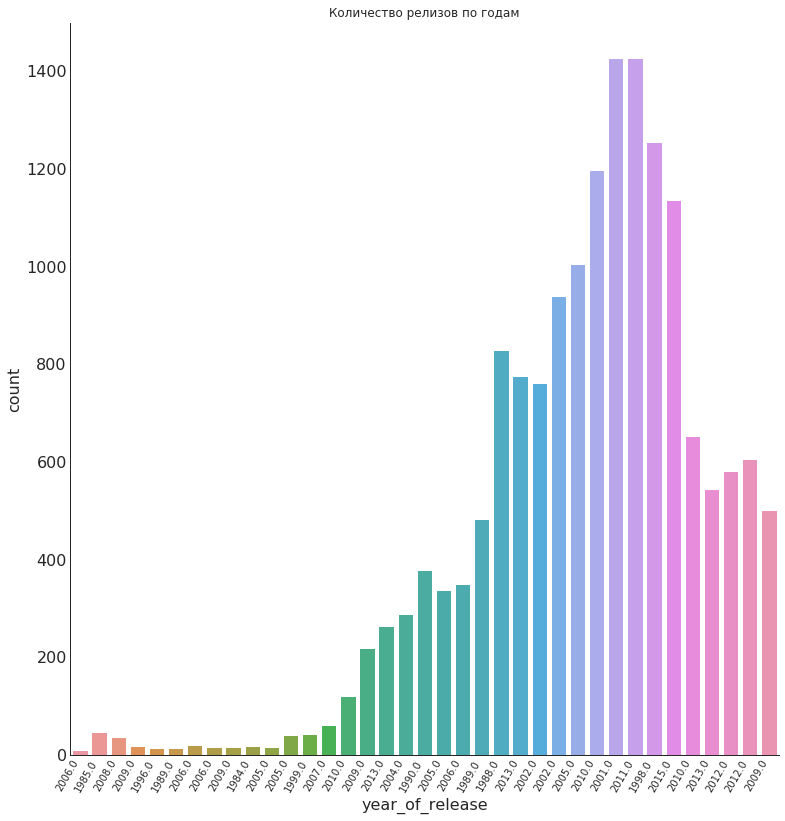

In [17]:
sns.catplot(x='year_of_release',
            kind='count',
            data=games, height=11, aspect=1)
plt.gca().set_xticklabels(games['year_of_release'], rotation=60, horizontalalignment= 'right',fontsize=10)

plt.title('Количество релизов по годам',fontsize=12)
plt.show()

Данные за период с 1980 по 1991 не очень важны для исследования тенденций рынка. Мы видим, что до 1994 года количество игр очень невелико. Видимо это связано с тем, что сам рынок еще практически не сформировался, количество устройств у пользователей было весьмва невелико. Начиная с 1994 по 2001 наблюдаем постепенный рост, с 2002 наблюдается очень большой прирост по количеству выпущенных игр. В 2008-2009 годах количество выпущенных игр достигло пиковых значений. После этого начался спад, скорее всего связанный с распространением мобильных устройств и онлайн игр.


Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [18]:
#напишем функцию для того, чтобы построить график суммарных продаж по платформам
def sorted_sales_by_platform(groupby_column, func, y='name'):
    plt.style.use('seaborn-pastel')
    plt.title('Суммарные продажи по платформам')
    df_to_plot = games.groupby(groupby_column)[y]
    
    if func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=(20,10), ec='black')


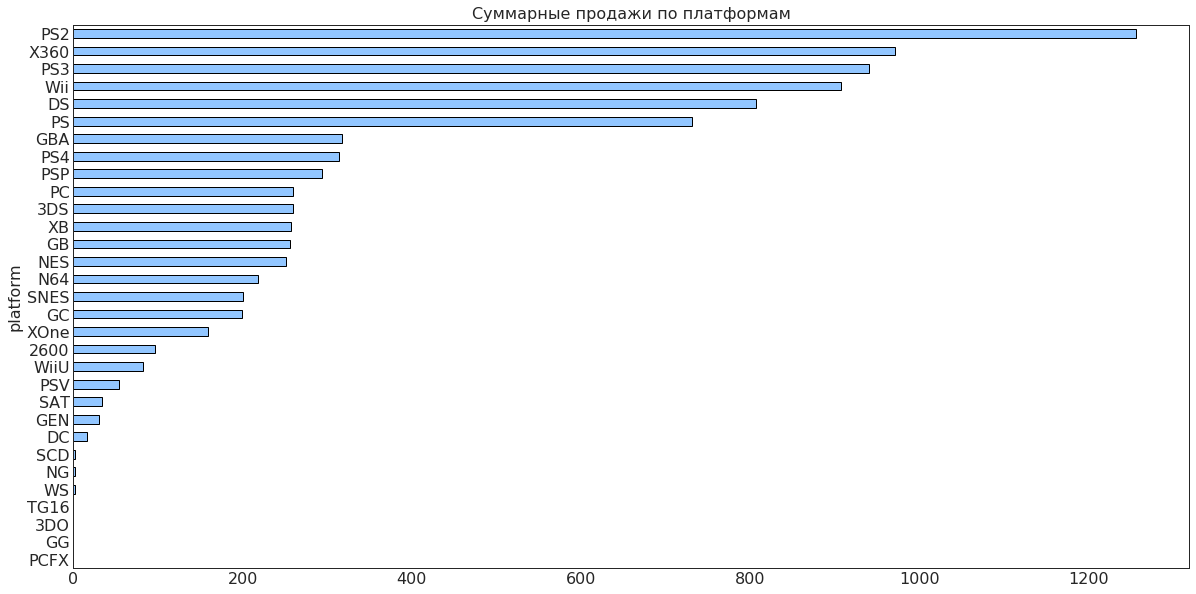

In [19]:
sorted_sales_by_platform('platform', 'sum', 'total_sales')

Очевидно, что явными лидерами по суммарным продажам игр являются 6 платформ __PS2__, __X360__, __PS3__, __Wii__, __DS__, __PS__.

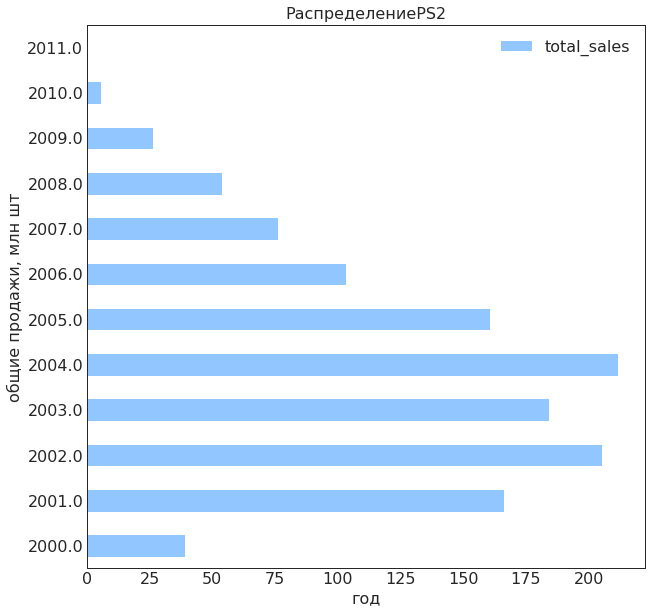

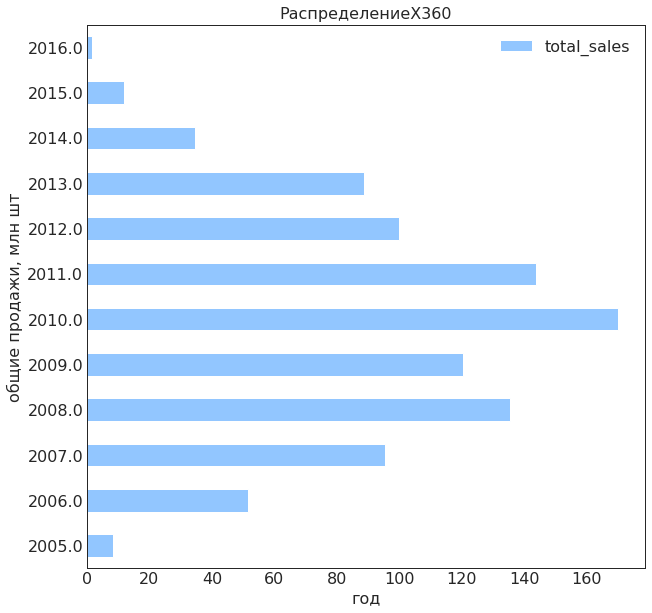

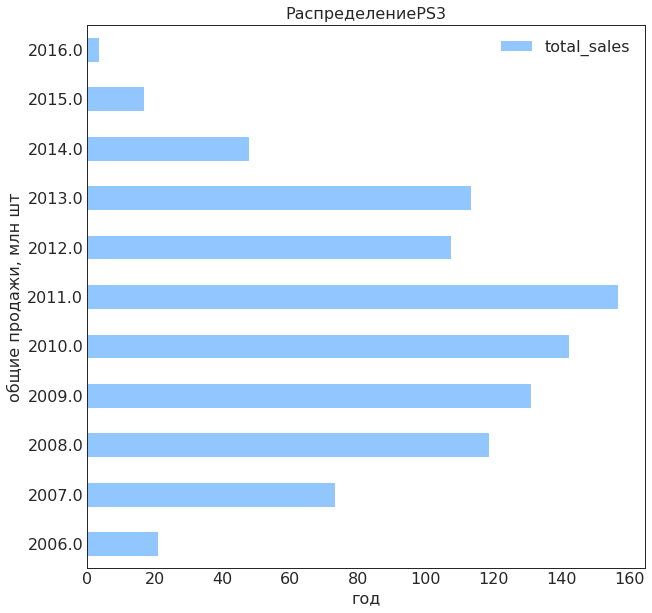

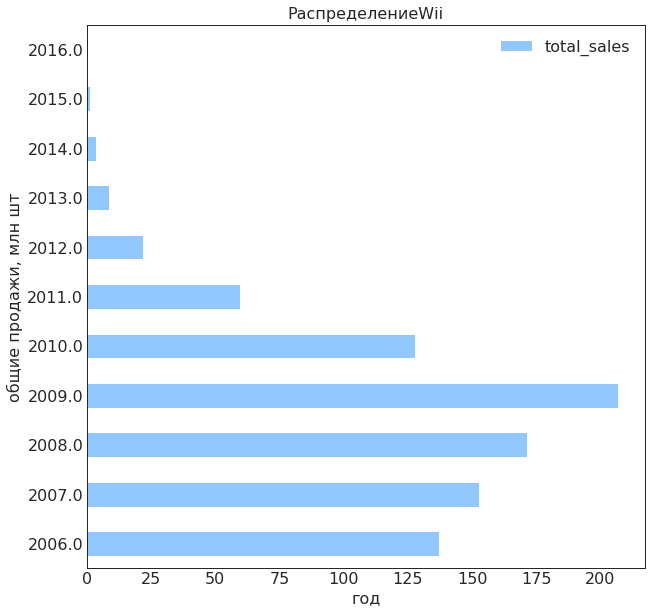

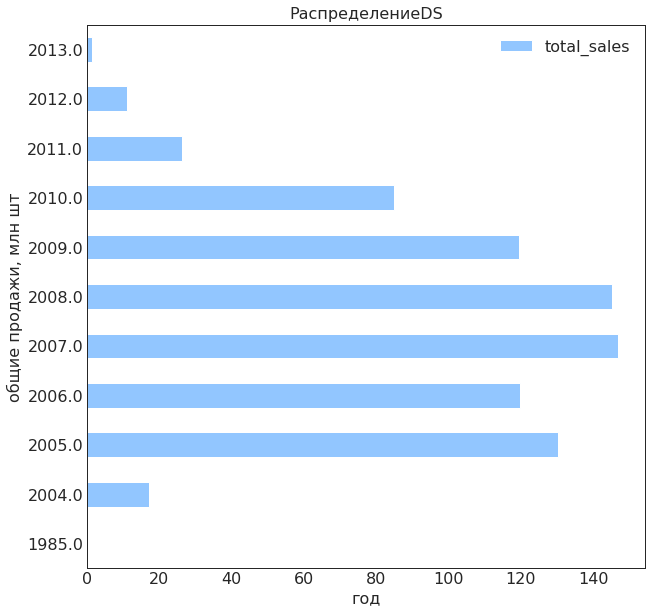

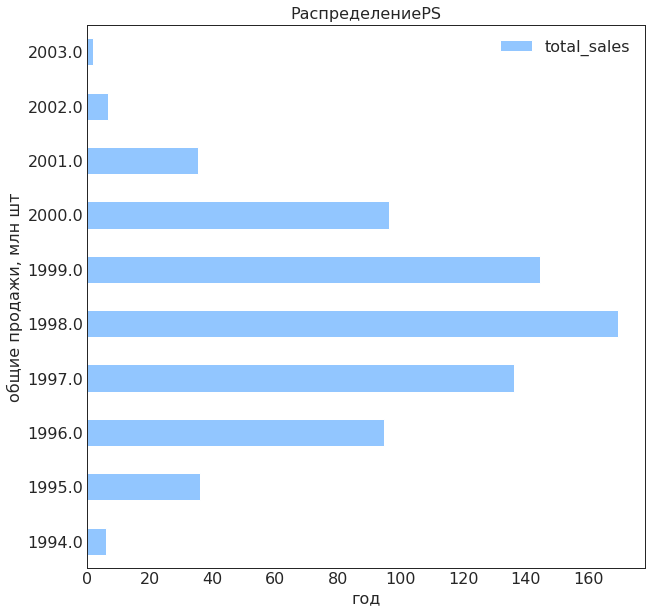

In [20]:
#построим функцию для построения распределения продаж первых 5ти платформ
year = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
year.columns = ['platform', 'total_sales']

def get_plot (platform):
    
    games.query('platform == @platform').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='barh') 
    
    plt.title('Распределение' + platform)
    
    plt.xlabel("год")
    plt.ylabel("общие продажи, млн шт")
    plt.show()

    
for platform in year.head(6).index:
    get_plot (platform)
    
    

In [21]:
#определим сколько лет существует каждая из платформ

games['year_of_last_release']  = games['year_of_release']
gp = games.pivot_table(index='platform', aggfunc={'year_of_release':'min', 'year_of_last_release':'max', 'total_sales':'sum'})
gp['period'] = gp['year_of_last_release'] - gp['year_of_release']
gp.sort_values(by='period', ascending=False)


,total_sales,year_of_last_release,year_of_release,period
platform,,,,
PC,259.52,2016.0,1985.0,31.0
DS,806.12,2013.0,1985.0,28.0
GB,255.46,2001.0,1988.0,13.0
X360,971.42,2016.0,2005.0,11.0
PSP,294.05,2015.0,2004.0,11.0
PS2,1255.77,2011.0,2000.0,11.0
NES,251.05,1994.0,1983.0,11.0
DC,15.95,2008.0,1998.0,10.0
Wii,907.51,2016.0,2006.0,10.0


Считается, что платформа живет пока на нее выпускают игры.  Мы видим, что срок существования платформы находится в диапазоне от 0 до 31 года. За какой характерный срок появляются новые и исчезают старые платформы? чтобы ответить на этот вопрос, рассчитаем  медиану срока существования 10 лидеров рынка по продажам игр.

In [22]:
gp.sort_values(by='total_sales', ascending=False)['period'].head(10).median()

10.5

Итак, характерный срок продолжительности жизни платформы 10,5 лет. В графиках распределения продаж первых пяти платформам этот срок также прослеживается. Наиболее популярные платформы развиваются на протяжении 10 лет. Но есть и абсолютные долгожители на рынке - это PC и DC.  

Исходя из проведенного анализа можно сказать, что наиболее актуальным периодом для исследования закономерностей развития игрового рынка является период с 2006 по 2016 год. Данный период по продолжительнсти соответствует характерному сроку продолжительности жизни платформы, за этот период есть данные по всем популярным платформам, также на этот период приходится большинство выпущенных игр.  

In [23]:
#создадим срез actual_games_data и в дальнейшем будем продолжать работать с этим датафреймом
actual_data=games.query('year_of_release >= 2006')

#выведем статистику по срезу
actual_data.describe()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,year_of_last_release
count,10333.000000,10333.000000,10333.000000,10333.000000,10333.000000,4990.000000,4955.000000,10333.000000,10333.000000
mean,2010.052744,0.230976,0.144779,0.054322,0.053522,68.444289,6.844379,0.483598,2010.052744
std,2.870550,0.763236,0.546651,0.242978,0.182402,13.953837,1.502213,1.552724,2.870550
min,2006.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,2006.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.100000,0.050000,2008.000000
50%,2010.000000,0.070000,0.010000,0.000000,0.010000,70.000000,7.200000,0.140000,2010.000000
75%,2012.000000,0.210000,0.100000,0.030000,0.040000,79.000000,7.900000,0.410000,2012.000000
max,2016.000000,41.360000,28.960000,6.500000,8.450000,98.000000,9.500000,82.540000,2016.000000


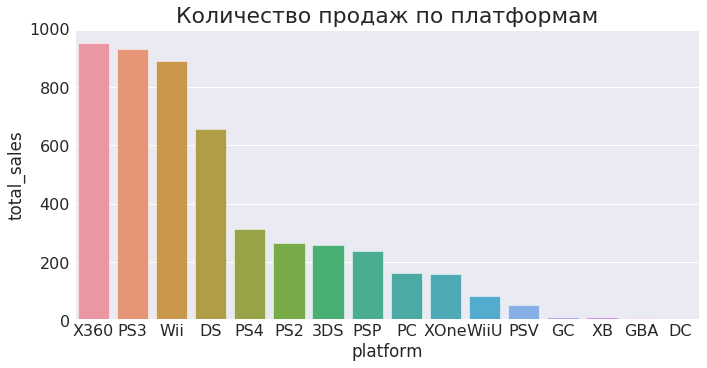

In [61]:
actual_data_pvt = actual_data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
 
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(data = actual_data_pvt, x='platform', y='total_sales')
plt.title('Количество продаж по платформам',fontsize=22)
plt.show()

По продажам лидируют следующие платформы - X360, PS3, Wii, DS, PS4.

<div class="alert alert-info" role="alert">
Посмотрим на распределение продаж по платформам.(*Данные за 2016 год могут быть неполными)
</div>

In [134]:
#создаем срез по лидерам продаж
top_platforms = ['X360', 'PS3', 'Wii', 'DS', 'PS4']
top_platforms_data = actual_data.query('platform in @top_platforms') 


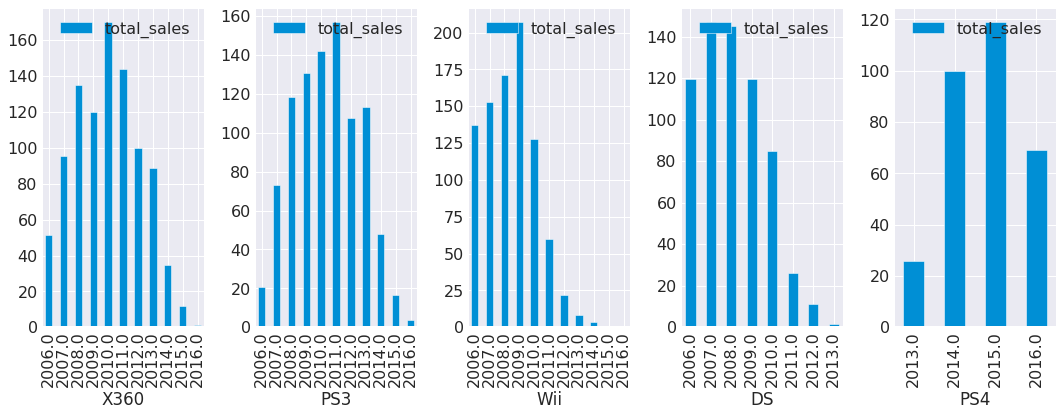

In [128]:
# определим функцию для вывода диаграмм для сравнения. 
def total_sales_by_year(data, my_list,n,m, ysize):
    temp = data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    plt.subplots(n,m,figsize=(15,ysize))
    i = 1
    for platform in my_list:
        ax = plt.subplot(n,m,i)
        l = list(temp.query('platform==@platform').index.get_level_values(1)) 
        temp.query('platform==@platform').plot(kind='bar', ax=ax, label=platform)
        plt.legend()
        plt.xlabel(platform)
        i+=1
        ax.set_xticklabels(l) 
    plt.tight_layout()


total_sales_by_year(top_platforms_data,top_platforms,1,5, 6)

<div class="alert alert-info" role="alert">
Видим, что практически все популярные платформы, за исключением PS4 к 2016 остановились в своем развитии. Но и у PS4 в 2016 году сильно упали продажи. Возможно это из-за того, что данные по 2016 году могут быть неполными.
</div>    

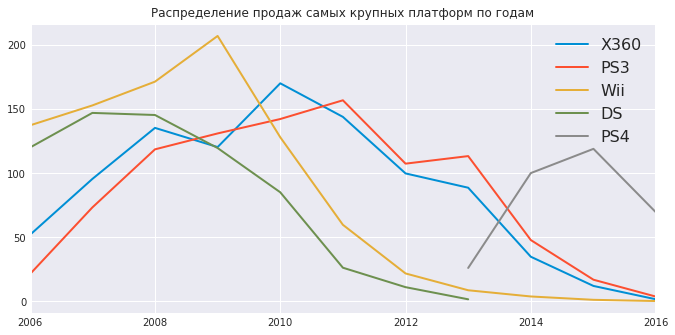

In [124]:
# Построим график распределения продаж по платформам
ax = plt.gca()

for platform in top_platforms :
    #subset = dinamics.get_group(platform) 
    #subset.plot( x= 'year_of_release' ,  y = 'total_sales',  kind = 'line' ,  grid = True, figsize = (15,7),linewidth = 2, alpha = 0.6,  legend = True)
    actual_data.query('platform == @platform').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='line', fontsize=10,linewidth=2, label=platform, ax=ax, figsize=(10,5))
ax.set_xlabel('')
ax.legend(top_platforms)
plt.title('Распределение продаж самых крупных платформ по годам',fontsize=12)
plt.show()

<div class="alert alert-info" role="alert">
Посмотрим какие платформы вообще остались "в живых" на конец периода 
</div>


In [130]:
actual_2016 = actual_data.query('year_of_release == 2016')

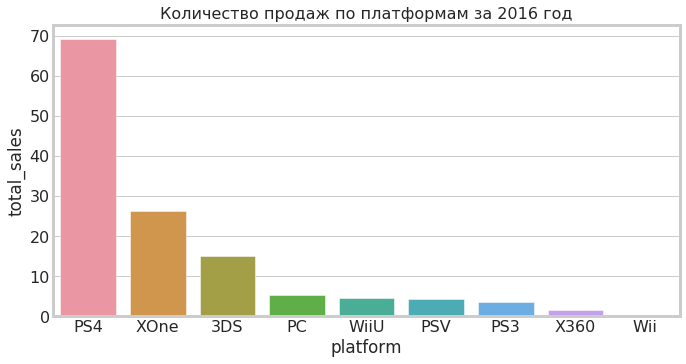

In [133]:
actual_2016_pvt = actual_2016.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
 
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(data = actual_2016_pvt, x='platform', y='total_sales')
plt.title('Количество продаж по платформам за 2016 год',fontsize=16)
plt.show()

<div class="alert alert-info" role="alert">
PS4, XOne, 3DS, PC,WiiU сформировали топ-5 продаж на 2016 год. При этом PS4 лидирует со значительным отрывом


Получается, наиболее интересные  и актуальные платформы для исследования это PS4, XOne, 3DS


</div> 

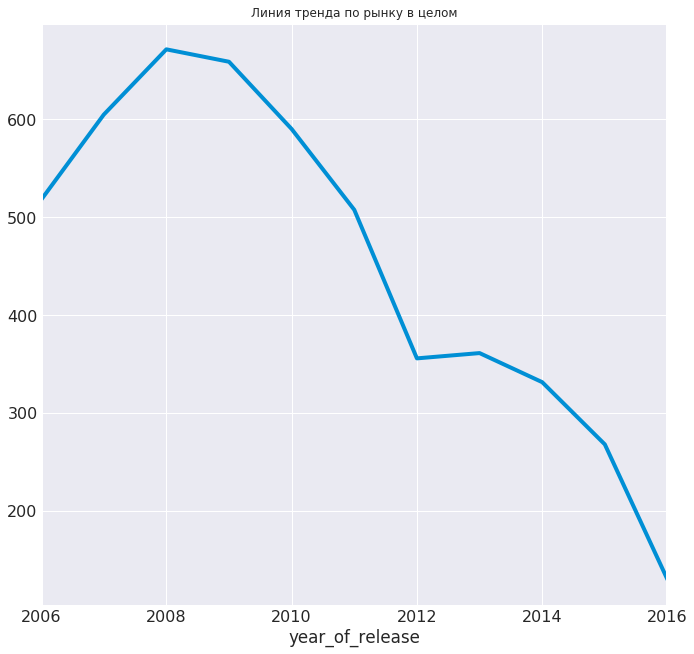

In [126]:
#выведем линию тренда по рынку в целом
actual_data.groupby('year_of_release')['total_sales'].sum().plot()
plt.title('Линия тренда по рынку в целом',fontsize=12)
plt.show()

Продажи игр, выпущенных по всем  платформам постоянно снижаются, начиная с 2009 года. Таким образом, можно сказать, что весь рынок игр падает.

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Оценим разницу в продажах и в средних продажах на разных платформах. Опишем результат.

In [29]:
#Выведем статистические показатели по столбцу 'total_sales'
actual_data['total_sales'].describe()

count    10333.000000
mean         0.483598
std          1.552724
min          0.000000
25%          0.050000
50%          0.140000
75%          0.410000
max         82.540000
Name: total_sales, dtype: float64

Мы видим, что максимум по всем продажам составляет 82.54 миллиона проданных копий. Построим графики размаха для каждой платформы.

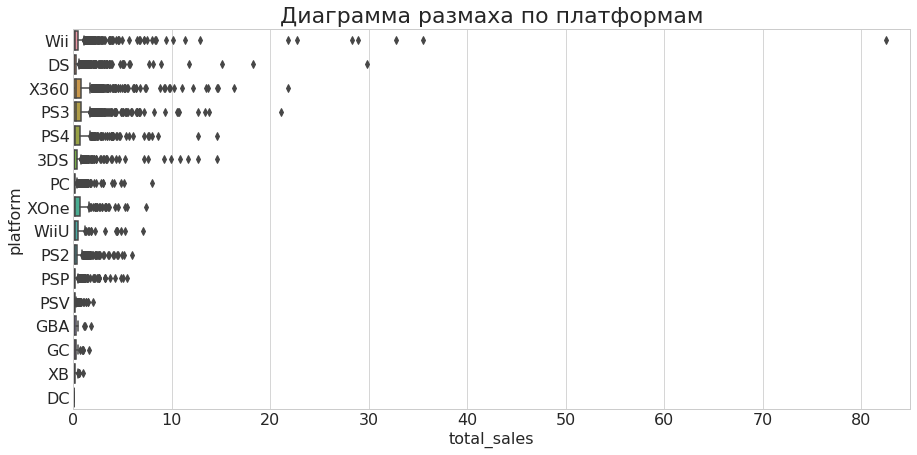

In [30]:
fig, ax = plt.subplots(figsize = (15,7))
sns.boxplot(data = games.query('year_of_release >= 2006'), x= 'total_sales', y = 'platform', orient = 'h')
 
plt.xlim(0,85)
plt.title('Диаграмма размаха по платформам',fontsize=22)
plt.show()

На графике размаха видно, что по основным платформам количество проданных копий составляет порядка 2 млн - количества выше этой цифры - явные выбросы. Построим боксплоты, исключив выбросы.

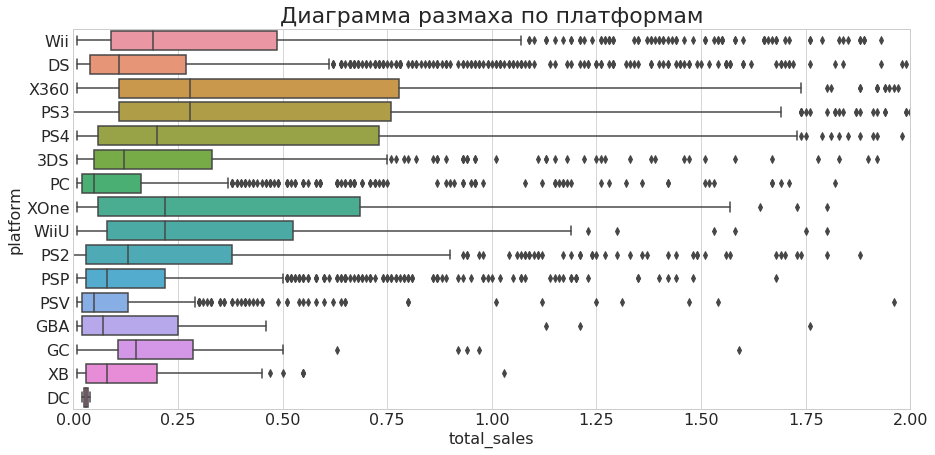

In [31]:
fig, ax = plt.subplots(figsize = (15,7))
sns.boxplot(data = games.query('year_of_release >= 2006'), x= 'total_sales', y = 'platform', orient = 'h')
 
plt.xlim(0,2)
plt.title('Диаграмма размаха по платформам',fontsize=22)
plt.show()

Tоповые платформы - X360,PS3,PS4,XOne,WiiU
Медиана по топовым платформам варьируется от 0,1 до 0,3 млн проданных копий.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и X360 - на уровне 1,75 млн долларов.
У остальных - от 1 до 1,6 миллионов проданных копий.
Среди всех выделяется  платформа DC - у нее все показатели значительно ниже, чем у других платформ.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
    

<div class="alert alert-info" role="alert">
Исключаем пропуски при оценке корреляции 
</div>


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


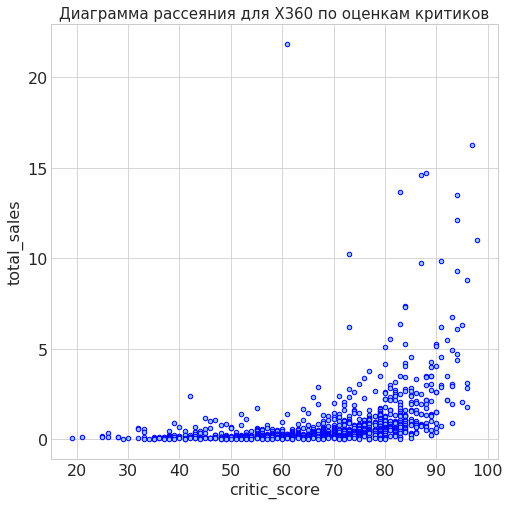

In [32]:
#строим диаграмму pассеяния для популярной платформы X360 по оценке критиков

cs_X360 = actual_data[(actual_data['platform'] == 'X360') & (actual_data['critic_score'] != 'nan')].copy()
cs_X360.plot(kind='scatter', x='critic_score', y='total_sales', ec='blue', figsize=(8,8))
plt.title('Диаграмма рассеяния для X360 по оценкам критиков',fontsize=15)
plt.show()

Чем выше средний рейтинг критиков тем выше количество продаж.

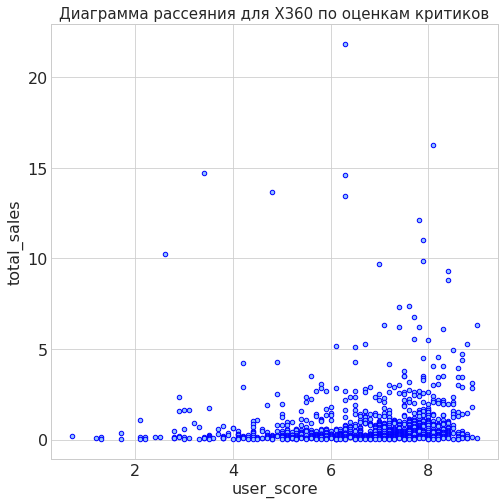

In [33]:
#строим диаграмму pассеяния для популярной платформы X360 по оценке пользователей
us_X360 = actual_data[(actual_data['platform'] == 'X360') & (actual_data['user_score'] != 'nan')].copy()
us_X360.plot(kind='scatter', x='user_score', y='total_sales', ec='blue', figsize=(8,8))
plt.title('Диаграмма рассеяния для X360 по оценкам критиков',fontsize=15)
plt.show()

Похожие результаты, только выбросов больше, скорее всего это связано с тем, что пользователей игр больше чем критиков, и их оценки носят более субъективный характер.

In [34]:
#исключим пропуски для оченки корреляции
actual_data_corr = actual_data.dropna()


/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


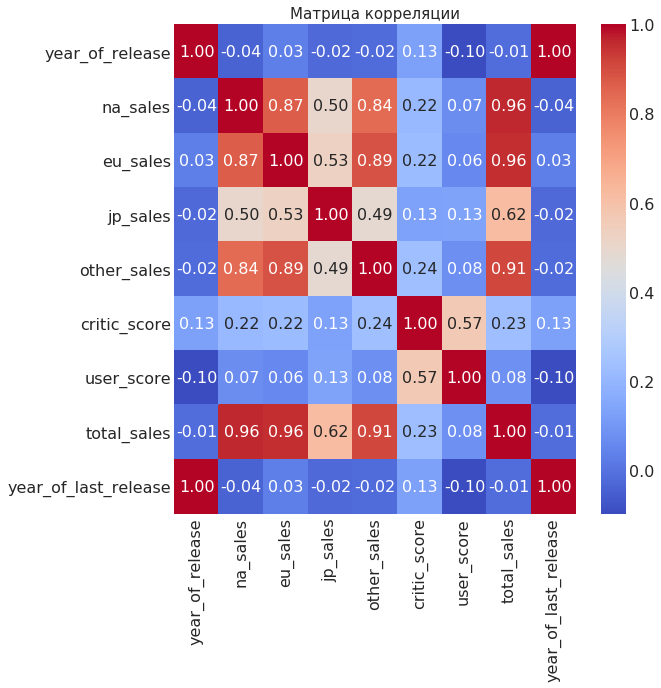

In [35]:
#построим матрицу корреляции между всеми параметрами.Воспользуемся графиком heatmap библиотеки seaborn

plt.figure(figsize =(9,9))
sns.heatmap(actual_data_corr.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws={'size':16})
plt.title('Матрица корреляции',fontsize=15)
plt.show()

Оценка критиков больше влияет на количество продаж; влияние оценки пользователей на количество продаж значительно слабее.

Исследуем общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

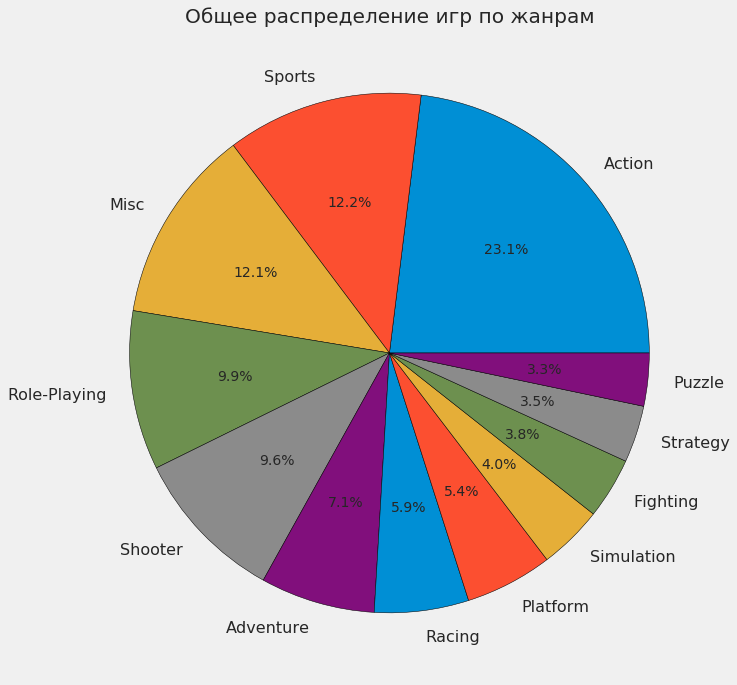

In [36]:
# построим круговую диаграмму с распределением по жанрам
labels = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']


plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,10))
plt.pie(list(actual_data['genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Общее распределение игр по жанрам')
plt.tight_layout()
plt.show()

In [37]:
actual_data['genre'].value_counts()

Action          2382
Sports          1262
Misc            1253
Adventure       1023
Role-Playing     996
Shooter          737
Simulation       606
Racing           562
Fighting         413
Strategy         393
Puzzle           366
Platform         340
Name: genre, dtype: int64

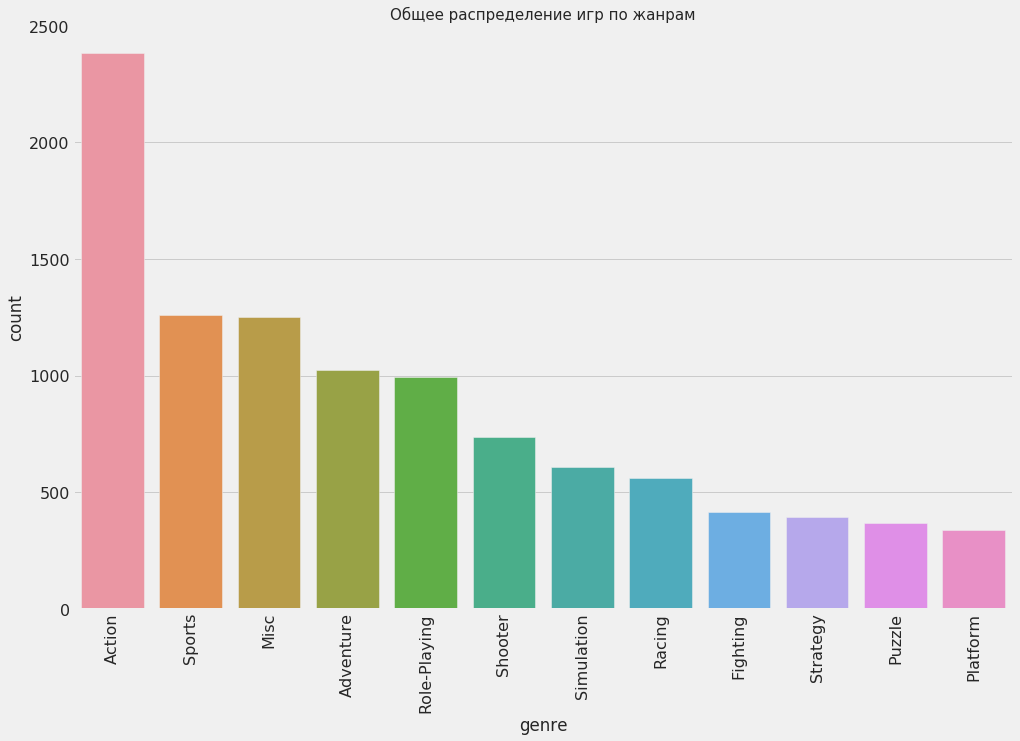

In [38]:
plt.figure(figsize=(15, 10))
sns.countplot(x="genre", data=actual_data, order = actual_data['genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Общее распределение игр по жанрам',fontsize=15)
plt.show()

Практически одна четверть всех игр - в жанре Action - это самый популярный жанр. Спортивных игр и игр в смешанном жанре проиблизительно равное количество, за  ними идут приключения и ролевые игры. Меньше всего игр в жанре puzzle.


In [227]:
genre_data = actual_data.groupby('genre').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)
genre_data


,total_sales
genre,
Action,1116.65
Sports,793.85
Shooter,717.04
Misc,554.86
Role-Playing,522.40
Racing,299.00
Platform,279.74
Simulation,220.65
Fighting,188.42


Самыми прибыльными жанрами являются игры в жанре Action, Sports и Shooter. Самым низкоприбыльным стал жанр Strategy.

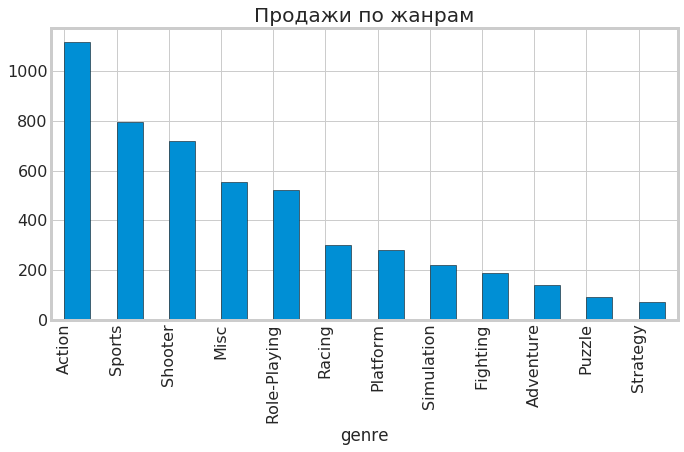

In [241]:
ax = plt.gca()
sales_by_genre = genre_data['total_sales']
sales_by_genre.plot(kind='bar', figsize=(10,5), ec='black', ax=ax, width=0.5, position=0)
plt.title('Продажи по жанрам')
plt.show()


## Портрет пользователя каждого региона <a name="step3"></a>



Определим для пользователя каждого региона (NA, EU, JP):
 * Самые популярные платформы (топ-5). 
 * Самые популярные жанры (топ-5). 
 * Влияние рейтинга ESRB на продажи в отдельном регионе

In [41]:
#определяем функцию для построения графиков для 5 самых популярных платформ и жанров
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = actual_data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Продажи в странах Северной Америки', 'eu_sales': 'Продажи в странах Европы', 'jp_sales': 'Продажи в Японии'}
    color_dict = {'na_sales': None, 'eu_sales': 'blue', 'jp_sales': 'darkblue'}
    plot = pivot.plot(kind='barh', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(15)

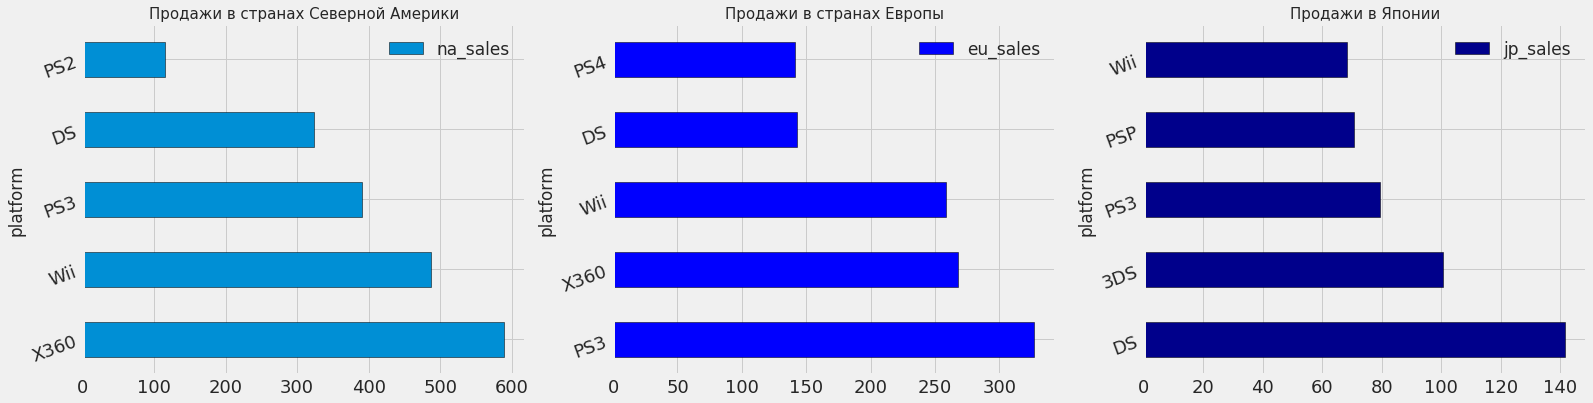

In [42]:
#построим графики для отображения самых популярных платформ
fig, axes = plt.subplots(1, 3, figsize=(24,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В странах Северной Америки предпочитают платформы X360 и Wii, затем идут платформы PS3 и DS, продажи  пятой платформы из списка - PS2 очень сильно отстают от продаж остальных платформ, вошедших в топ-5 ;для X360 было продано почти 600 млн. копий.

Игроки в европейских странах выбирают PS3, у второй (Х360) и третьей (PS3) платформ из списка продажи различаются незначительно,4 и 5 место делят платформы DS и PS4; при  этом совокупный объем продаж (емкость рынка) почти в два раза меньше, чем в Северной Америке.

Но и в Европе и в Северной Америке в топ -3 вошли одни и те жи платформы.

В Японии лидером по количеству проданных копий стала платформа DS, было продано больше 140 миллионов копий для этой платформы, что немногим меньше продаж игр для этой платформы в странах Европы, но надо еще учитывать, что население Японии значительно уступает по численности населению Еврропейских стран. На 2 месте по продажам - платформа 3DS, на третьем PS3, PSP И Wii стоят на 4 и 5 месте.
Выбор японцев сильно отличается от выбора европейцев и североамериканцев.

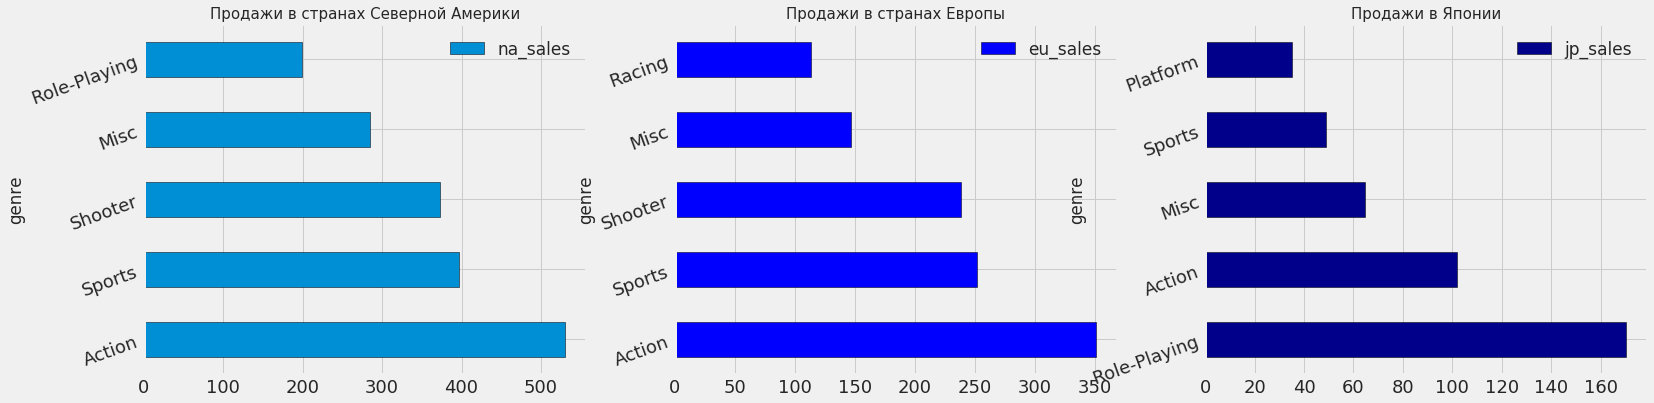

In [43]:
#построим графики для отображения самых популярных жанров
fig, axes = plt.subplots(1, 3, figsize=(24,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)



Список самых популярных жанров для стран Северной Америки и стран Европы практически идентичен, на первом месте идет жанр Action, на втором жанр Sports, Shooter на третьем месте, на 4 - игры смешанного жанра. Ещлько в 5 строчке рейтинга есть различие, в странах Северной Аменрики топ-5 популярных жанров закрывают ролевые игры, а в странах Европы - гонки.

Рынок Японии, конечно, сильно отличается, здесь первое место с большим отрывом заняли ролевые игры, затем идет жанр Action, на 3 строчке рейтинга находятся игры смешанного жанра, потом идут спортивнаы и платформенные игры

Что такое рейтинг ESRB?

__ESRB__ - Entertainment Software Rating Board - Негосударственная организация, основное направление деятельности - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association. 

In [44]:
#выведем список значений в столбце рейтинг
actual_data['rating'].unique()

array(['E', 'M', 'no rating', 'T', 'E10+', 'EC', 'RP'], dtype=object)

Добавим новый столбец в датафрейм где расшифруем значение аббревиатур рейтинга

 * __E__ («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально __K-A__ ("Kids to Adults")
 * __M__ («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории
 * __T__ («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики
 * __E10+__(«Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены. Рейтинг был принят ESRB 2 марта 2005 года. 
 * __RP__ («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. это значение используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. 

In [45]:
#создаем словарь
rating_dict = {'E': 'Для всех', 'M': 'от 17 лет', 'T': '13-19 лет', 'E10+': 'от 10 лет', 'K-A': 'Для всех', 'RP': 'Рейтинг ожидается'}

In [46]:
#добавляем столбец в датафрейм
actual_data['rating_notion'] = actual_data[actual_data['rating'].notnull()]['rating'].map(rating_dict)

In [47]:
#выведем первые 10 строк для проверки
actual_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_of_last_release,rating_notion
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006.0,Для всех
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2008.0,Для всех
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009.0,Для всех
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,2006.0,Для всех
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,2006.0,Для всех
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,2009.0,Для всех
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70,2007.0,Для всех
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82,2010.0,Для всех
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80,2009.0,Для всех
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,2013.0,от 17 лет


Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

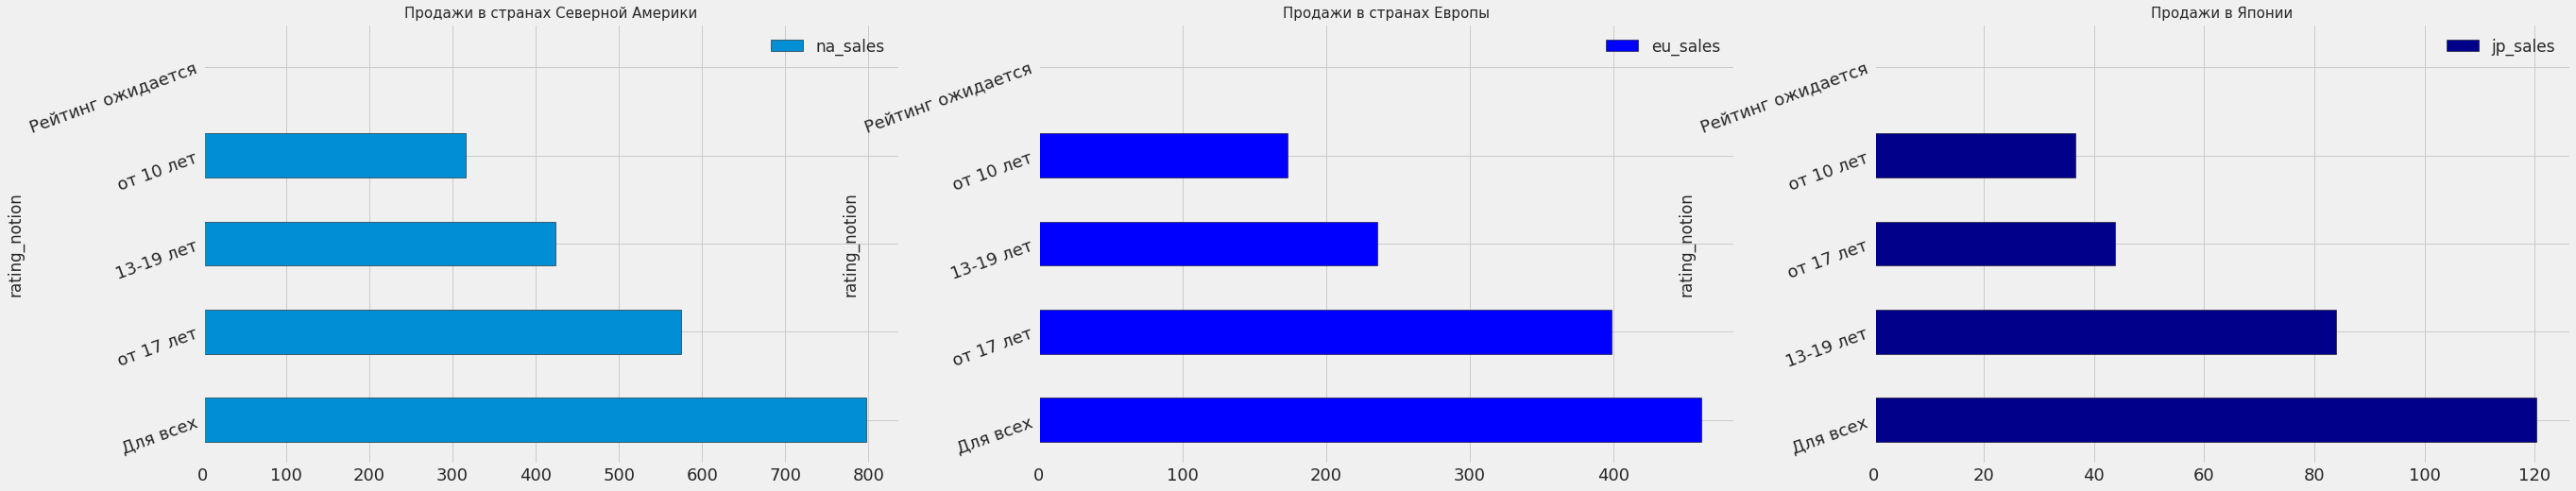

In [48]:
#выведем диаграмму влияния рейтинга на продажи по регионам
fig, axes = plt.subplots(1, 3, figsize=(40,8))

top_in_regions_plot('rating_notion', 'na_sales', 0)
top_in_regions_plot('rating_notion', 'eu_sales', 1)
top_in_regions_plot('rating_notion', 'jp_sales', 2)

В странах Северной Америки и стран Европы нет различий по данному показателю, популярнее вего игры с рейтингом "для всех", на втором месте - игры с пометкой от 17 лет.
В Японии - немного другая картина, на второе место по популярность вышли игры с рейтингом от 13 до 19 лет.

В целом можно сделать вывод, что пользовательские предпочтения потребителей в странах Северной Америки и Европы не сильно различаются, поэтому для продвижения на этих рынках можно будет использовать одну стратегиюс какими-то минимальными корректирвками. 

Рынок игр в Японии достаточно самобытен, не похож на рынки Европы и Северной Америки, для продвижения на этом рынке потребуется рязработка отдельной стратегии с учетом местной специфики. 

## Проверка гипотез <a name="step4"></a>

 Проверим следующие гипотезы   
 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

__Средние пользовательские рейтинги платформ Xbox One и PC одинаковые__

Нулевой гипотезой будет гипотеза, что средние наших выборок равны. 
Альтернативной гипотезой будет гипотеза что средние наших выборок различаются.

Будем использовать метод scipy.stats.ttest_ind так как у нас 2 независимые выборки.

Задаем критический уровень значимости как 0.05


Дисперсия рейтинга платформы Xbox One 1.7855118457300279
Дисперсия рейтинга платформы PC 2.2867092808774174
Разница дисперсий  -28.070239%



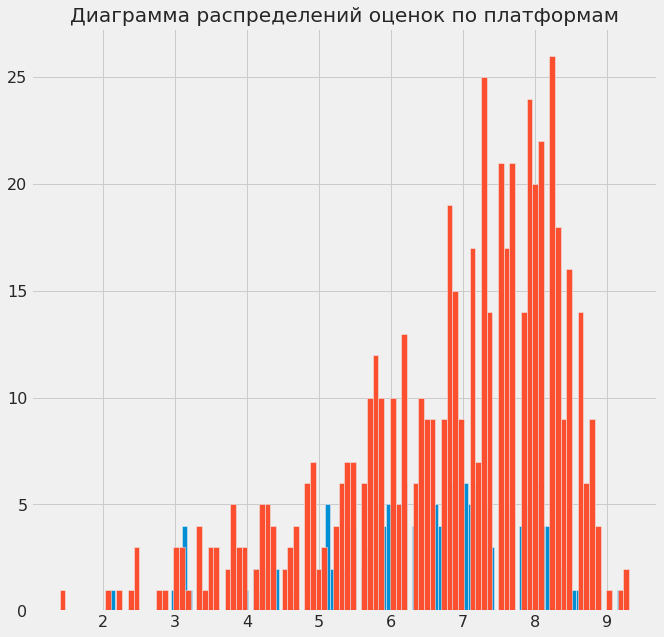

Xbox One count    165.000000
mean       6.538182
std        1.340298
min        2.100000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
PC count    567.000000
mean       6.816578
std        1.513522
min        1.400000
25%        5.900000
50%        7.300000
75%        8.000000
max        9.300000
Name: user_score, dtype: float64
p-значение: 0.023400700090684286
Отвергаем нулевую гипотезу


In [49]:
#Будем использовать датафрейм actual_data_corr, очищенный от пропусков
XOne = actual_data_corr.loc[actual_data_corr['platform'] == 'XOne', 'user_score']
PC = actual_data_corr.loc[actual_data_corr['platform'] == 'PC', 'user_score']
print('Дисперсия рейтинга платформы Xbox One',np.var(XOne))
print('Дисперсия рейтинга платформы PC',np.var(PC))
print('Разница дисперсий  {:%}'.format((np.var(XOne) - np.var(PC)) / np.var(XOne)))
print()
XOne.hist(bins=100)
PC.hist(bins=100)
plt.title('Диаграмма распределений оценок по платформам')
plt.show()
print('Xbox One',XOne.describe())
print('PC',PC.describe())
equal_var=False
alpha = .05
results = st.ttest_ind(
    XOne,
    PC,
    equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
 

Средние пользовательские рейтинги платформ Xbox One и PC различаются

 __Cредние пользовательские рейтинги жанров Action и Sports разные.__

Нулевой гипотезой будет гипотеза, что средние наших выборок разные.

Альтернативной гипотезой будет гипотеза что средние наших выборок равны

Будем использовать метод scipy.stats.ttest_ind так как у нас 2 независимые выборки.

Задаем критический уровень значимости как 0.05


Дисперсия оценок жанра action 1.7393892276104865
Дисперсия оценок жанра sports 2.146123444305414
Разница дисперсий  18.952042%



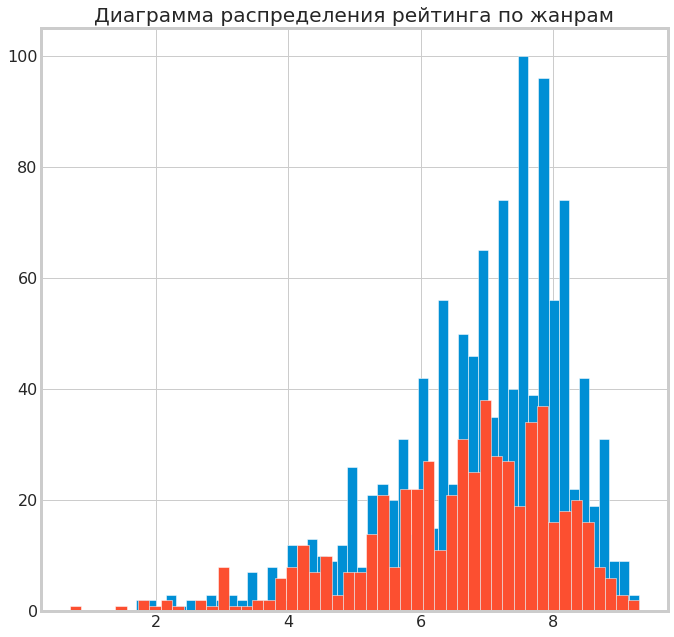

action count    1186.000000
mean        6.922007
std         1.319415
min         1.700000
25%         6.225000
50%         7.200000
75%         7.900000
max         9.300000
Name: user_score, dtype: float64
sports count    559.000000
mean       6.576565
std        1.466277
min        0.700000
25%        5.800000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64
p-значение: 2.4622727897769643e-06
Отвергаем нулевую гипотезу


In [242]:
#Будем использовать датафрейм actual_data_corr, очищенный от пропусков
action = actual_data_corr.loc[actual_data_corr['genre'] == 'Action', 'user_score']
sports = actual_data_corr.loc[actual_data_corr['genre'] == 'Sports', 'user_score']
print('Дисперсия оценок жанра action',np.var(action))
print('Дисперсия оценок жанра sports',np.var(sports))
print('Разница дисперсий  {:%}'.format((np.var(sports) - np.var(action)) / np.var(sports)))
print()
action.hist(bins=50)
sports.hist(bins=50)
plt.title('Диаграмма распределения рейтинга по жанрам')
plt.show()
print('action',action.describe())
print('sports',sports.describe())
equal_var=False
alpha = .05
results = st.ttest_ind(
    action,
    sports,
    equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу" )
else:
    print("Не получилось отвергнуть нулевую гипотезу")
 

Cредние пользовательские рейтинги жанров Action и Sports равные.

 ## Общий вывод <a name="step5"></a>

Нам были предоставлены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Была поставлена задача выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Самый главный вывод - рынок компьютерных игр находится в очень печальном состоянии. Практически все популярные платформы - X360,PS3,XOne,WiiU - к 2016 остановились в своем развитии, единственной платформа из числа топовых, которая продолжила свое развитие в 2016 году стала PS4 .Количество продаж игр, выпущенных для любой из платформ постоянно снижается, начиная с 2009 года. Очевидно будущее за мобильными приложениями и онлайн-играми.

Большое влияние на количество продаж и прибыльность игры оказывают оценки критиков. Оценки пользователей практически не влияют на рост числа продаж.

Самыми популярными и прибыльными жанрами являются Action и Sport.

Также при планировании рекламной компании необходимо учитывать региональные особенности рынков, если рынок стран Северной Америки и Европы очень похож между собой, то рынок стран Азии (в частности Японии) имеет большие отличия и требует индивидуальных решений. В Японии стоит продвигать игры в жанре Role-playing и платформах DS и 3DS. В странах Северной Америки и Европы более прибыльным будет жанр Action, но в Европе нужно будет делать ставку на платформу PS3, a в Северной Америке на платформу X360.

